0.0075
r 0.0020499999999999997
d/2: 0.00375


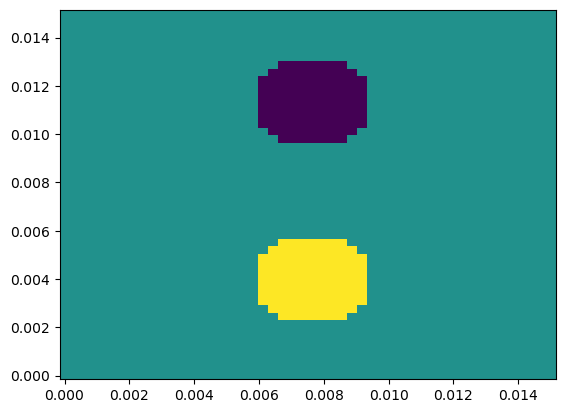

<Figure size 640x480 with 0 Axes>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

n=50
length=0.015
x,xstep=np.linspace(0,length,n,retstep=True)
y,ystep=np.linspace(0,length,n,retstep=True)
z=np.random.rand(n,n)
d=(11.6-4.1)*10**-3
print(d)
dx=xstep
dy=ystep
def create_fdMatrix(n,Mask):
    A=np.zeros((n**2,n**2))
    for i in range(0,n*n):
        for j in range(0,n*n):
            x=i//n
            y=i%n
            if (Mask[x,y]!=0):
                if i==j:
                    A[i,j]=1
                else:
                    A[i,j]=0
            else:
                if i == j:
                    A[i,j]=-2/dx**2 -2/dy**2
                elif i-j == 1 and not (i%n==0 and j%n==n-1):
                    A[i,j]= 1/dx**2
                elif i-j == -1 and not (j%n==0 and i%n==n-1):
                    A[i,j]= 1/dx**2
                elif abs(i-j) == n:
                    A[i,j]= 1/dy**2
                else:
                    A[i,j]=0
                
    return A
def drawCircle(x,y,r):
    xx, yy = np.mgrid[:n, :n]
    circle = np.sqrt((xx-x) ** 2 + (yy-y) ** 2)
    return np.array(circle<(r),dtype=float)

r=(2.05*(10**-3))

print("r",r)
#print(r)
#print(xstep)
r=r//xstep
 
xoff=n/2
yoff=n/2
R=d/2//xstep
print("d/2:",d/2)
V=30
Amp=5

#Create pixel mask for grounded objects
donut= V*drawCircle(xoff-R,yoff,r)-V*drawCircle(xoff+R,yoff,r) + 0.001*drawCircle(xoff,yoff-R,r)+ 0.001*drawCircle(xoff,yoff+R,r)


fig, ax = plt.subplots()
ax.pcolormesh(x, y, donut)

plt.figure()
b=donut.flatten()
#Create finite differences matrix
A=create_fdMatrix(n,donut)
#Solve linear equation system
u = np.linalg.solve(A, b)
u = np.reshape(u, (n,n))
#print(A)



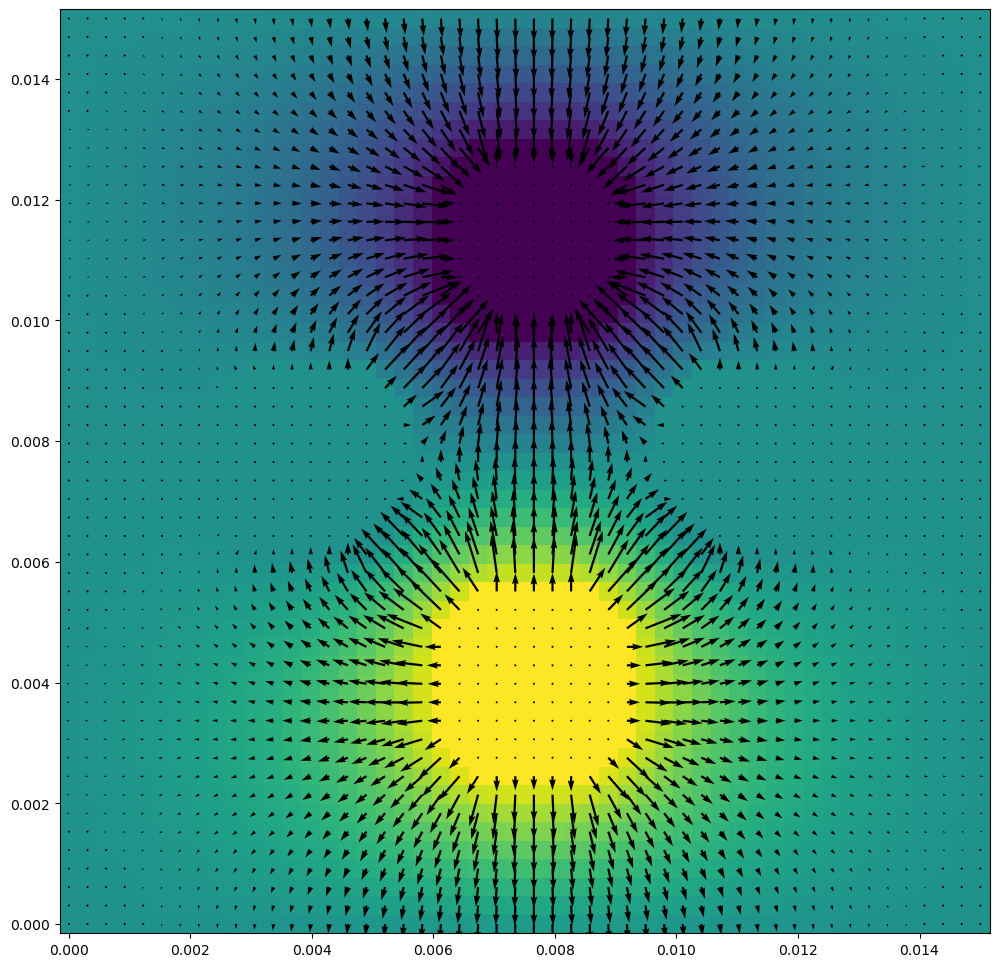

In [4]:
#Calculate the electric field from the potential
Ey,Ex=np.gradient(u,dx)

fig, ax = plt.subplots()
ax.pcolormesh(x, y, u)
fig.set_figheight(12)
fig.set_figwidth(12)
scale=10
ax.quiver(x,y,(-Ex)/scale,(-Ey)/scale,clim=(0,10),units='xy')

-11528.333472666109 -0.007881361883209616


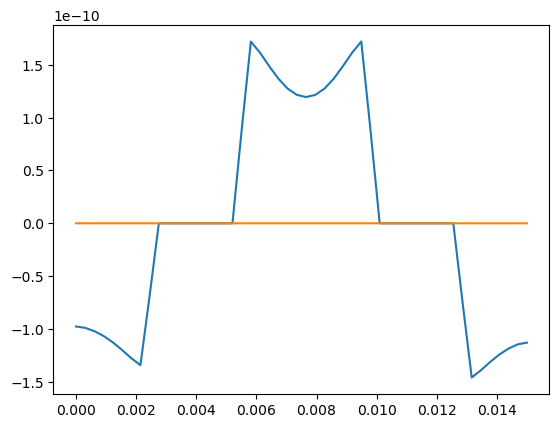

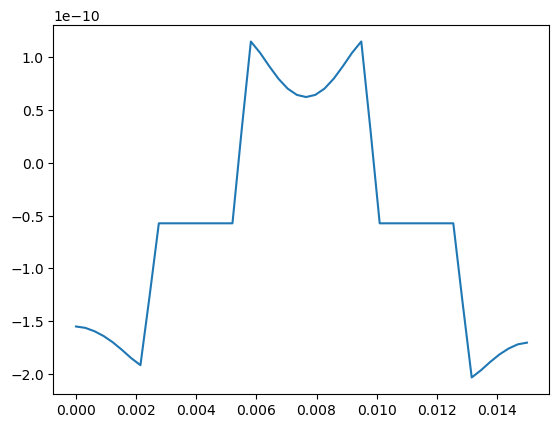

In [5]:


print(Ey[n//2,n//2],Ex[n//2,n//2])
plt.plot(y,-Ey[:,n//2]*1.0366454602954855e-14)
plt.plot(y,-Ex[:,n//2]*1.0366454602954855e-14)
plt.figure()
plt.plot(y, -Ey[:,n//2]*1.0366454602954855e-14-      5.843900235764463e-12*9.812)

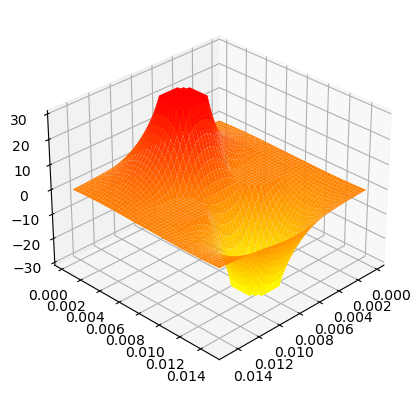

In [6]:
#Alternative representation of the potential field
x = np.linspace(0,length,n+2)[1:-1]
y = np.linspace(0,length,n+2)[1:-1]
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, u, cmap="autumn_r", lw=0, rstride=1, cstride=1)
ax.view_init(elev=30, azim=45, roll=0)

plt.show()

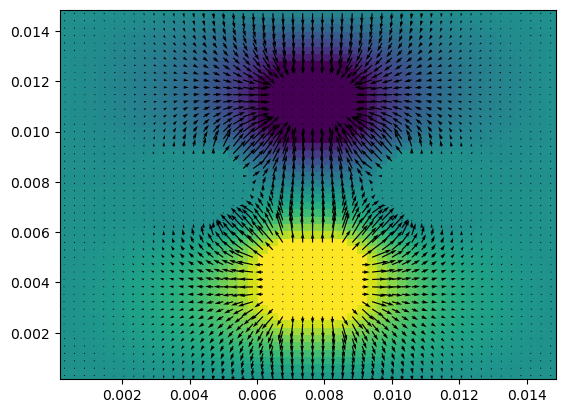

In [7]:
#Animating the an AC current source on the horizontal poles
fig, ax = plt.subplots()
xdata, ydata = [], []
ln = ax.pcolormesh(x, y, donut)
ln1= ax.quiver(x,y,(-Ex)/scale,(-Ey)/scale,clim=(0,10),units='xy')

def init():
    #ax.set_xlim(0, 2*np.pi)
    #ax.set_ylim(-1, 1)
    return ln,
A=create_fdMatrix(n,donut)
def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    freq=1
    Amp=60
    donut= V*drawCircle(xoff-R,yoff,r)-V*drawCircle(xoff+R,yoff,r) + Amp*np.sin(freq*frame)*drawCircle(xoff,yoff-R,r)-Amp*np.sin(freq*frame)*drawCircle(xoff,yoff+R,r)
    b=donut.flatten()
    u = np.linalg.solve(A, b)
    u = np.reshape(u, (n,n))    
    Ey,Ex=np.gradient(u,dx)


    ln1.set_UVC((-Ex)/scale,(-Ey)/scale)
    ln.set_array(u)
    
    return ln,

ani = FuncAnimation(fig, update,interval=100, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
ani.save('517.gif')
plt.show()